# Ohio high school and school district report cards

Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'1.5.3'

In [2]:
hs = pd.read_csv('data-4sugD.csv')

# remove null performance index values
hs = hs.replace('NC', np.nan)
hs = hs[hs['Performance Index'].notnull()]

# trim strings
hs['School District'] = hs['School District'].str.strip()

# convert column data types
hs = hs.replace('NR', np.nan)
hs['Performance Index'] = pd.to_numeric(hs['Performance Index'])
hs['A'] = pd.to_numeric(hs['A'])
hs['P'] = pd.to_numeric(hs['P'])
hs['GC'] = pd.to_numeric(hs['GC'])
hs['G'] = pd.to_numeric(hs['G'])
hs.head()

School School District  Performance Index    A    P   GC  \
0  Rocky River High School     Rocky River            108.404  5.0  5.0  5.0   
1      Oakwood High School         Oakwood            108.000  5.0  5.0  5.0   
2   Versailles High School      Versailles            106.940  5.0  4.0  5.0   
3      Madeira High School         Madeira            106.915  5.0  5.0  5.0   
4    Mariemont High School       Mariemont            106.906  5.0  5.0  5.0   

     G  
0  5.0  
1  5.0  
2  5.0  
3  5.0  
4  5.0

### Adding rank and a performance index percentage columns

In [3]:
# are there ties in the performance index ranking (other than "nan")
l = len(hs['Performance Index'])
u = len(hs['Performance Index'].unique())
l - u
# only 5, so no worries

5

In [4]:
hs['Rank'] = hs['Performance Index'].rank(ascending=False)
hs['PI%'] = hs['Performance Index'] / hs['Performance Index'].max() * 100
hs = hs.round(1)

### Filtering out local districts

In [5]:
local_names = [
    'Bowling Green School District', 
    'Rossford',
    'Sylvania Schools',
    'Maumee',
    'Perrysburg',
    'Ottawa Hills',
    'Toledo',
    'Anthony Wayne',
    'Eastwood',
    'Northwood Schools',
    'Springfield School District',
    'Otsego',
    'North Baltimore',
    'Washington'
    'Oregon',
    'Lake',
    'Elmwood'
]
# local_schools = hs[hs['School District'].str.contains('|'.join(local_names))]
local_schools = hs[hs['School District'].isin(local_names)]
local_schools

School                School District  \
8                   Perrysburg High School                     Perrysburg   
13                Ottawa Hills High School                   Ottawa Hills   
43               Lake Middle / High School                           Lake   
63   Toledo Technology Academy High School                         Toledo   
98                  Eastwood I High School                       Eastwood   
110       Toledo Early College High School                         Toledo   
130         Sylvania Northview High School               Sylvania Schools   
131              Anthony Wayne High School                  Anthony Wayne   
149         Sylvania Southview High School               Sylvania Schools   
173                     Maumee High School                         Maumee   
250                     Otsego High School                         Otsego   
353              Bowling Green High School  Bowling Green School District   
399                    Elmwood High School                        Elmwood   
430            North Baltimore High School                North Baltimore   
443                       Lake High School                           Lake   
445                   Rossford High School                       Rossford   
658                    Bowsher High School                         Toledo   
682                Springfield High School    Springfield School District   
725                      Waite High School                         Toledo   
729                      Start High School                         Toledo   
734                     Rogers High School                         Toledo   
750       SPRINGFIELD SCHOOL OF INNOVATION    Springfield School District   
752               Jones Leadership Academy                         Toledo   
780  Toledo Public Schools Virtual Academy                         Toledo   
787                Springfield City Online    Springfield School District   
796             Jesup W. Scott High School                         Toledo   
803                   Woodward High School                         Toledo   

     Performance Index    A    P   GC    G   Rank   PI%  
8                105.9  5.0  5.0  5.0  5.0    9.0  97.7  
13               104.4  5.0  5.0  5.0  5.0   14.0  96.3  
43               101.2  5.0  4.0  5.0  5.0   44.0  93.3  
63                98.6  5.0  4.0  4.0  5.0   64.0  91.0  
98                95.9  4.0  3.0  5.0  4.0   99.0  88.4  
110               95.3  4.0  5.0  5.0  5.0  111.0  87.9  
130               94.1  4.0  5.0  5.0  5.0  131.0  86.8  
131               94.1  4.0  1.0  4.0  5.0  132.0  86.8  
149               92.9  4.0  5.0  4.0  4.0  150.0  85.7  
173               91.6  4.0  4.0  5.0  5.0  174.0  84.5  
250               88.0  4.0  5.0  4.0  4.0  251.0  81.2  
353               83.5  3.0  3.0  4.0  4.0  354.0  77.0  
399               81.9  3.0  1.0  2.0  4.0  400.0  75.6  
430               80.4  3.0  2.0  2.0  5.0  431.0  74.1  
443               79.5  3.0  2.0  2.0  5.0  444.0  73.4  
445               79.5  3.0  3.0  4.0  4.0  446.0  73.3  
658               62.5  2.0  3.0  2.0  2.0  659.0  57.7  
682               59.5  4.0  3.0  5.0  4.0  683.0  54.9  
725               53.3  1.0  3.0  2.0  1.0  726.0  49.2  
729               52.3  1.0  1.0  1.0  1.0  730.0  48.2  
734               52.0  1.0  1.0  1.0  1.0  735.0  48.0  
750               48.4  1.0  1.0  2.0  1.0  751.0  44.6  
752               48.0  1.0  1.0  3.0  5.0  753.0  44.2  
780               42.9  1.0  2.0  1.0  NaN  781.0  39.6  
787               41.5  1.0  1.0  1.0  NaN  788.0  38.2  
796               40.1  1.0  1.0  2.0  1.0  797.0  37.0  
803               37.2  1.0  2.0  2.0  1.0  804.0  34.3

<AxesSubplot: title={'center': "Local schools by 'Performance Index' (2022)"}, xlabel='School'>

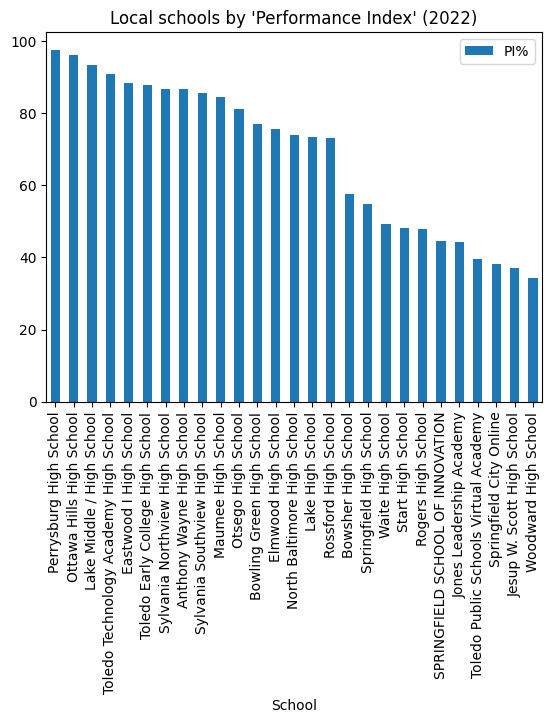

In [6]:
local_schools.plot.bar(x='School', y='PI%', title='Local schools by \'Performance Index\' (2022)')

## Add district ratings (2022)

In [7]:
# read district data
districts = pd.read_csv('DISTRICT-RATINGS_2122-1.csv')

# remove null performance index values
districts = districts.replace('NR', np.nan)
# hs = hs[hs['Performance Index'].notnull()]

# convert column data types
districts['Achievement Component Star Rating'] = pd.to_numeric(districts['Achievement Component Star Rating'])
districts['Progress Component Star Rating'] = pd.to_numeric(districts['Progress Component Star Rating'])
districts['Gap Closing Component Star Rating'] = pd.to_numeric(districts['Gap Closing Component Star Rating'])
districts['Graduation Component Star Rating'] = pd.to_numeric(districts['Graduation Component Star Rating'])
districts['Early Literacy Component Star Rating'] = pd.to_numeric(districts['Early Literacy Component Star Rating'])

cols = [
    'Achievement Component Star Rating', 
    'Progress Component Star Rating', 
    'Gap Closing Component Star Rating',
    'Graduation Component Star Rating',
    'Early Literacy Component Star Rating'
    ]
districts['Average Star Ratings'] = districts[cols].mean(axis=1)
districts['Rank'] = districts['Average Star Ratings'].rank(ascending=False)
districts['Rank Percentile'] = 100 - (districts['Rank'] / len(districts) * 100)
districts = districts.sort_values(by=['Rank'], ascending=True)
local_districts = districts[districts['County'].isin(['Wood', 'Lucas'])]
local_districts.head()

District IRN                District Name County    Region  \
401         48215           Ottawa Hills Local  Lucas  Region 1   
211         45583  Perrysburg Exempted Village   Wood  Region 1   
140         44875             Sylvania Schools  Lucas  Region 1   
89          44362                  Maumee City  Lucas  Region 1   
400         48207          Anthony Wayne Local  Lucas  Region 1   

     Overall Rating  Achievement Component Star Rating  \
401             NaN                                  5   
211             NaN                                  5   
140             NaN                                  4   
89              NaN                                  4   
400             NaN                                  5   

     Progress Component Star Rating  Gap Closing Component Star Rating  \
401                             5.0                                  5   
211                             5.0                                  5   
140                             5.0                                  5   
89                              5.0                                  5   
400                             1.0                                  4   

     Graduation Component Star Rating  Early Literacy Component Star Rating  \
401                               5.0                                   4.0   
211                               5.0                                   3.0   
140                               4.0                                   3.0   
89                                5.0                                   2.0   
400                               5.0                                   5.0   

     College Career Workforce Military Readiness Component Star Rating  \
401                                                NaN                   
211                                                NaN                   
140                                                NaN                   
89                                                 NaN                   
400                                                NaN                   

     Average Star Ratings   Rank  Rank Percentile  
401                   4.8   22.0        96.375618  
211                   4.6   43.0        92.915980  
140                   4.2  114.0        81.219110  
89                    4.2  114.0        81.219110  
400                   4.0  158.0        73.970346

In [8]:
districts = local_districts['District Name']
def get_full_district(short_name):
    if short_name == 'Bowling Green School District':
        return 'Bowling Green City School District'
    if short_name == 'Springfield School District':
        return 'Springfield Local'
    result = [f for f in [d if short_name in d else 'Not found' for d in districts] if f != 'Not found'][0]
    return result

local_schools['Full District'] = local_schools['School District'].map(get_full_district)
local_schools[['School', 'PI%', 'School District', 'Full District']]

/var/folders/hf/8pwzwyjj5rl7n85_tx9p7y5h0000gq/T/ipykernel_23849/1868900232.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_schools['Full District'] = local_schools['School District'].map(get_full_district)


School   PI%  \
8                   Perrysburg High School  97.7   
13                Ottawa Hills High School  96.3   
43               Lake Middle / High School  93.3   
63   Toledo Technology Academy High School  91.0   
98                  Eastwood I High School  88.4   
110       Toledo Early College High School  87.9   
130         Sylvania Northview High School  86.8   
131              Anthony Wayne High School  86.8   
149         Sylvania Southview High School  85.7   
173                     Maumee High School  84.5   
250                     Otsego High School  81.2   
353              Bowling Green High School  77.0   
399                    Elmwood High School  75.6   
430            North Baltimore High School  74.1   
443                       Lake High School  73.4   
445                   Rossford High School  73.3   
658                    Bowsher High School  57.7   
682                Springfield High School  54.9   
725                      Waite High School  49.2   
729                      Start High School  48.2   
734                     Rogers High School  48.0   
750       SPRINGFIELD SCHOOL OF INNOVATION  44.6   
752               Jones Leadership Academy  44.2   
780  Toledo Public Schools Virtual Academy  39.6   
787                Springfield City Online  38.2   
796             Jesup W. Scott High School  37.0   
803                   Woodward High School  34.3   

                   School District                       Full District  
8                       Perrysburg         Perrysburg Exempted Village  
13                    Ottawa Hills                  Ottawa Hills Local  
43                            Lake                          Lake Local  
63                          Toledo                         Toledo City  
98                        Eastwood                      Eastwood Local  
110                         Toledo                         Toledo City  
130               Sylvania Schools                    Sylvania Schools  
131                  Anthony Wayne                 Anthony Wayne Local  
149               Sylvania Schools                    Sylvania Schools  
173                         Maumee                         Maumee City  
250                         Otsego                        Otsego Local  
353  Bowling Green School District  Bowling Green City School District  
399                        Elmwood                       Elmwood Local  
430                North Baltimore               North Baltimore Local  
443                           Lake                          Lake Local  
445                       Rossford           Rossford Exempted Village  
658                         Toledo                         Toledo City  
682    Springfield School District                   Springfield Local  
725                         Toledo                         Toledo City  
729                         Toledo                         Toledo City  
734                         Toledo                         Toledo City  
750    Springfield School District                   Springfield Local  
752                         Toledo                         Toledo City  
780                         Toledo                         Toledo City  
787    Springfield School District                   Springfield Local  
796                         Toledo                         Toledo City  
803                         Toledo                         Toledo City

In [9]:
local_schools_and_districts = local_schools.merge(local_districts, left_on='Full District', right_on='District Name')
local_schools_and_districts.columns
local_schools_and_districts.rename(columns={
    "Average Star Ratings": "District Star Rating",
    "Rank Percentile": "District Rank %",
    }, errors='raise', inplace=True)
local_schools_and_districts[['School', 'PI%', 'Full District', 'District Star Rating', 'District Rank %']].head()

School   PI%                Full District  \
0                 Perrysburg High School  97.7  Perrysburg Exempted Village   
1               Ottawa Hills High School  96.3           Ottawa Hills Local   
2              Lake Middle / High School  93.3                   Lake Local   
3                       Lake High School  73.4                   Lake Local   
4  Toledo Technology Academy High School  91.0                  Toledo City   

   District Star Rating  District Rank %  
0                   4.6        92.915980  
1                   4.8        96.375618  
2                   3.2        36.573311  
3                   3.2        36.573311  
4                   2.2         7.001647

<AxesSubplot: title={'center': "Local schools by 'Performance Index' (2022)"}, xlabel='School'>

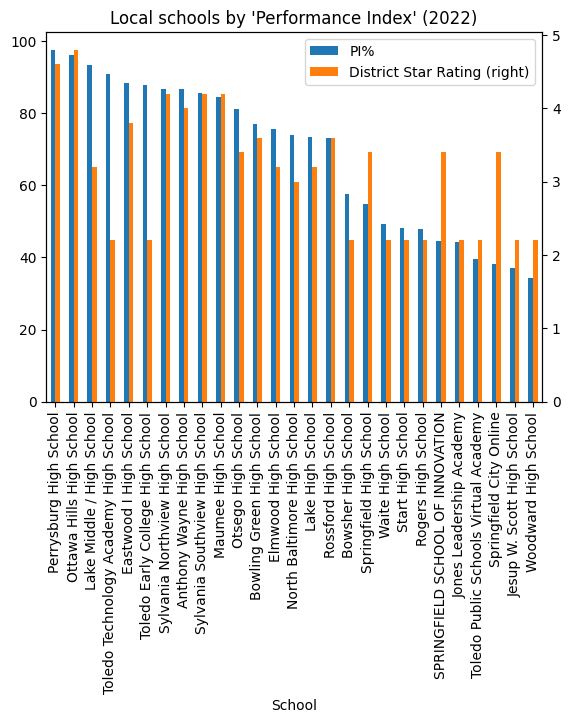

In [10]:
# plotting school and district rankings
local_schools_and_districts.sort_values(by=['PI%', 'District Star Rating'], ascending=False, inplace=True)
local_schools_and_districts[['PI%', 'District Star Rating','School']].plot.bar(x='School', secondary_y='District Star Rating', title='Local schools by \'Performance Index\' (2022)')